# Exploration des données des logs de distribution

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
# Lire un fichier Parquet
df = pd.read_parquet('../../data/logParquet/DetailedDistributionLogs_sub_2411222036.parquet')

# Afficher les premières lignes
print(df.head())

       Id                  DatetimeLog          Login          FirstName  \
0  508854  2024-09-10 03:01:59.7179654   Login_sub_75  FirstName_sub_320   
1  508855  2024-09-10 04:17:05.8834169  Login_sub_319   FirstName_sub_61   
2  508856  2024-09-10 04:17:31.7489801  Login_sub_197   FirstName_sub_91   
3  508857  2024-09-10 04:17:31.7489867  Login_sub_319   FirstName_sub_61   
4  508858  2024-09-10 04:18:18.9680921  Login_sub_197   FirstName_sub_91   

           LastName                                     DistributionId  \
0  LastName_sub_546  Distribution_62504cc0-a240-41f6-92d7-2db5a130032f   
1  LastName_sub_163  Distribution_96292402-819b-4849-860e-fa41269655ca   
2  LastName_sub_207  Distribution_3a4e69d4-5c17-4c77-af81-96583336b81c   
3  LastName_sub_163  Distribution_3a4e69d4-5c17-4c77-af81-96583336b81c   
4  LastName_sub_207  Distribution_a43aecb3-0728-48aa-a2a2-b1cc9f4d3c3f   

           DistributionName  IsError              ScheduleId  \
0       Tableau des retours       

In [14]:
# Drop colonnes inutiles

df = df.drop(columns=['FirstName', 'LastName', 'IsError']) 

In [15]:
# Afficher les premières lignes
print(df.head())

       Id                  DatetimeLog          Login  \
0  508854  2024-09-10 03:01:59.7179654   Login_sub_75   
1  508855  2024-09-10 04:17:05.8834169  Login_sub_319   
2  508856  2024-09-10 04:17:31.7489801  Login_sub_197   
3  508857  2024-09-10 04:17:31.7489867  Login_sub_319   
4  508858  2024-09-10 04:18:18.9680921  Login_sub_197   

                                      DistributionId  \
0  Distribution_62504cc0-a240-41f6-92d7-2db5a130032f   
1  Distribution_96292402-819b-4849-860e-fa41269655ca   
2  Distribution_3a4e69d4-5c17-4c77-af81-96583336b81c   
3  Distribution_3a4e69d4-5c17-4c77-af81-96583336b81c   
4  Distribution_a43aecb3-0728-48aa-a2a2-b1cc9f4d3c3f   

           DistributionName              ScheduleId  \
0       Tableau des retours  ETLPROGRAMMATIONWQ0FX3   
1            Info PRIMFORCE  ETLPROGRAMMATIONWCLOA6   
2     Anomalies MyParc Page  ETLPROGRAMMATIONWCLOA6   
3     Anomalies MyParc Page  ETLPROGRAMMATIONWCLOA6   
4  Anomalies v2 MyParc Page  ETLPROGRAMMATION

In [5]:
n_unique_login = df['Login'].nunique()
print(f"Nombre de login différents : {n_unique_login}")

Nombre de login différents : 354


In [6]:
n_unique_distrib_name = df['DistributionName'].nunique()
print(f"Nombre de login différents : {n_unique_distrib_name}")

Nombre de login différents : 582


In [7]:
from IPython.display import display

display(df.head())  # Permet de voir un tableau interactif

,Id,DatetimeLog,Login,DistributionId,DistributionName,IsError,ScheduleId,ScheduleName,ExecutionGuid
0,508854,2024-09-10 03:01:59.7179654,Login_sub_75,Distribution_62504cc0-a240-41f6-92d7-2db5a130032f,Tableau des retours,0,ETLPROGRAMMATIONWQ0FX3,Messenger Quotidien Lun-Dim 3h,FC96BBA5-F84E-45FF-BB0F-5285992DCA74
1,508855,2024-09-10 04:17:05.8834169,Login_sub_319,Distribution_96292402-819b-4849-860e-fa41269655ca,Info PRIMFORCE,0,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,68CF8FEB-9393-4116-AD5F-3D39DA4032A6
2,508856,2024-09-10 04:17:31.7489801,Login_sub_197,Distribution_3a4e69d4-5c17-4c77-af81-96583336b81c,Anomalies MyParc Page,0,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,68CF8FEB-9393-4116-AD5F-3D39DA4032A6
3,508857,2024-09-10 04:17:31.7489867,Login_sub_319,Distribution_3a4e69d4-5c17-4c77-af81-96583336b81c,Anomalies MyParc Page,0,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,68CF8FEB-9393-4116-AD5F-3D39DA4032A6
4,508858,2024-09-10 04:18:18.9680921,Login_sub_197,Distribution_a43aecb3-0728-48aa-a2a2-b1cc9f4d3c3f,Anomalies v2 MyParc Page,0,ETLPROGRAMMATIONWCLOA6,ETL + Messenger Quotidien Lun-Dim vers Serveur...,68CF8FEB-9393-4116-AD5F-3D39DA4032A6


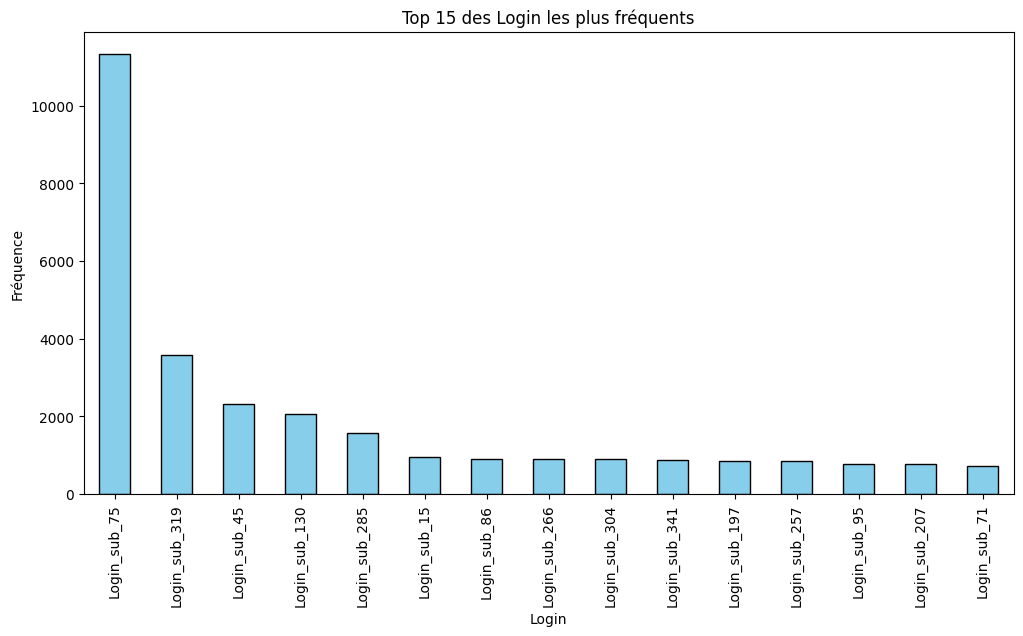

In [8]:
# Compter les occurrences des Login
login_counts = df['Login'].value_counts()

# Sélectionner les 15 plus fréquents
top_login = login_counts.head(15)

plt.figure(figsize=(12, 6))
top_login.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Login")
plt.ylabel("Fréquence")
plt.title("Top 15 des Login les plus fréquents")
plt.show()

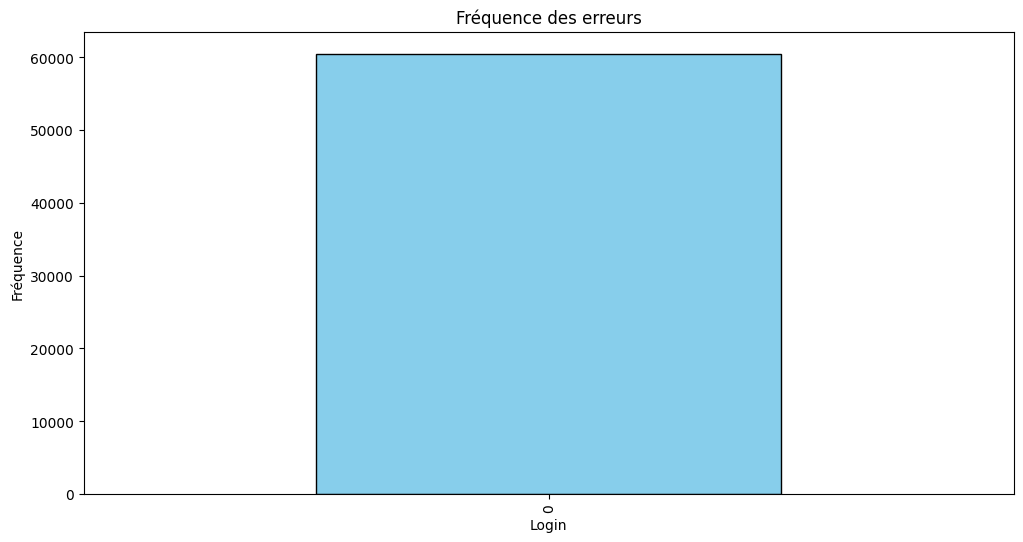

In [9]:
# Compter les occurrences des erreur
error_counts = df['IsError'].value_counts()

plt.figure(figsize=(12, 6))
error_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Login")
plt.ylabel("Fréquence")
plt.title("Fréquence des erreurs")
plt.show()

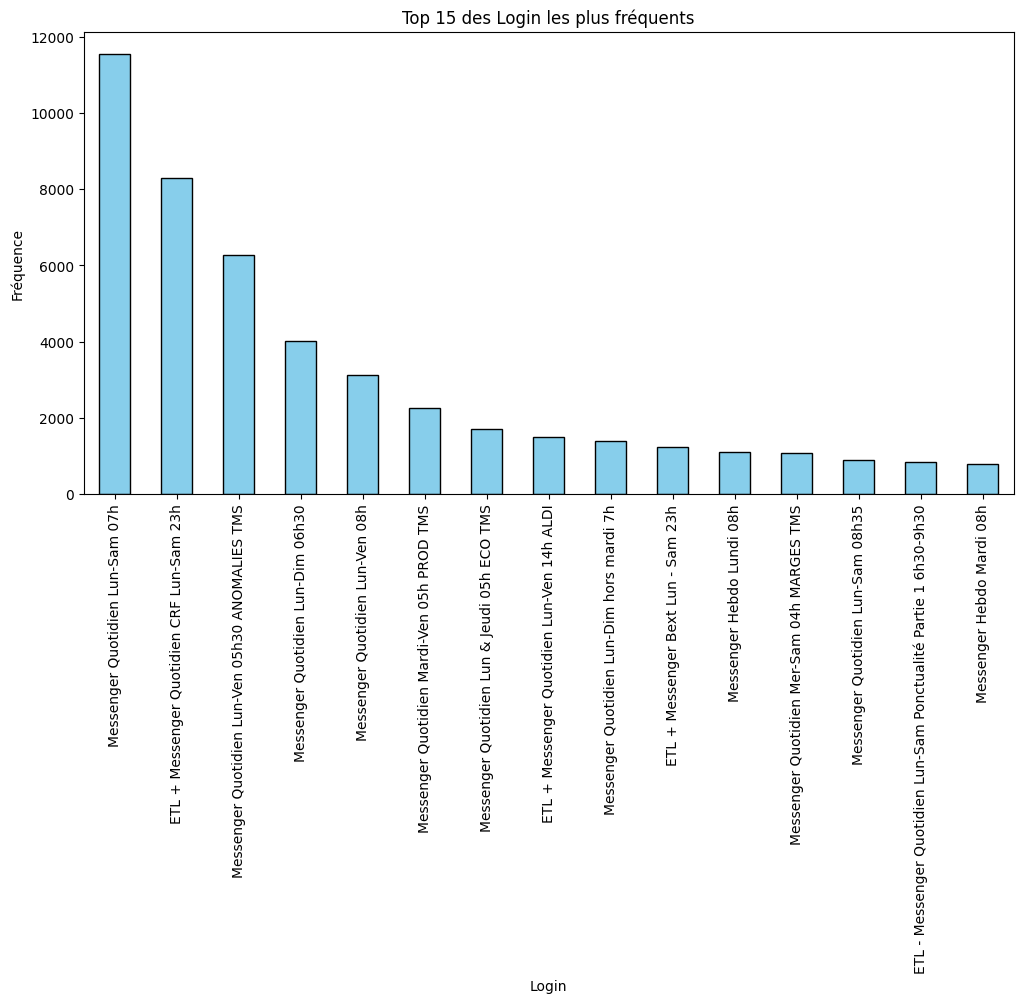

In [10]:
# Compter les occurrences des ScheduleName
ScheduleName_counts = df['ScheduleName'].value_counts()

# Sélectionner les 15 plus fréquents
top_ScheduleName = ScheduleName_counts.head(15)

plt.figure(figsize=(12, 6))
top_ScheduleName.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Login")
plt.ylabel("Fréquence")
plt.title("Top 15 des Login les plus fréquents")
plt.show()

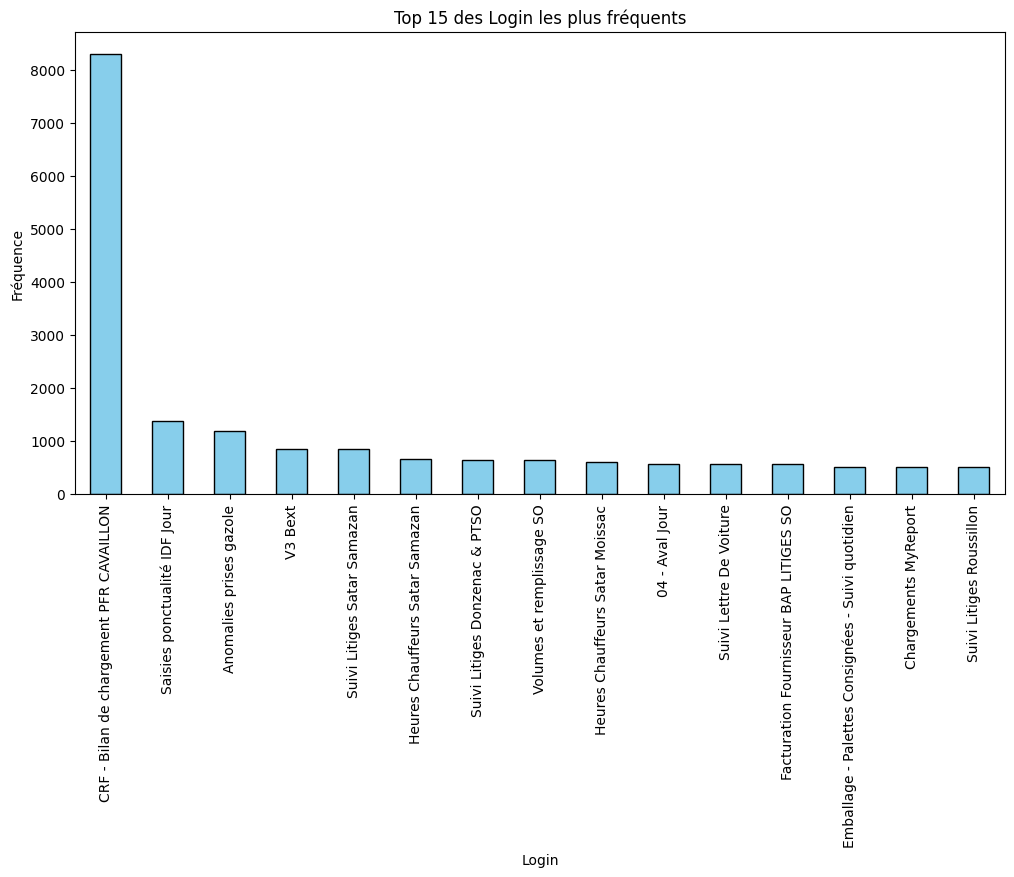

In [11]:
# Compter les occurrences des DistributionName
DistributionName_counts = df['DistributionName'].value_counts()

# Sélectionner les 15 plus fréquents
top_DistributionName = DistributionName_counts.head(15)

plt.figure(figsize=(12, 6))
top_DistributionName.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Login")
plt.ylabel("Fréquence")
plt.title("Top 15 des Login les plus fréquents")
plt.show()

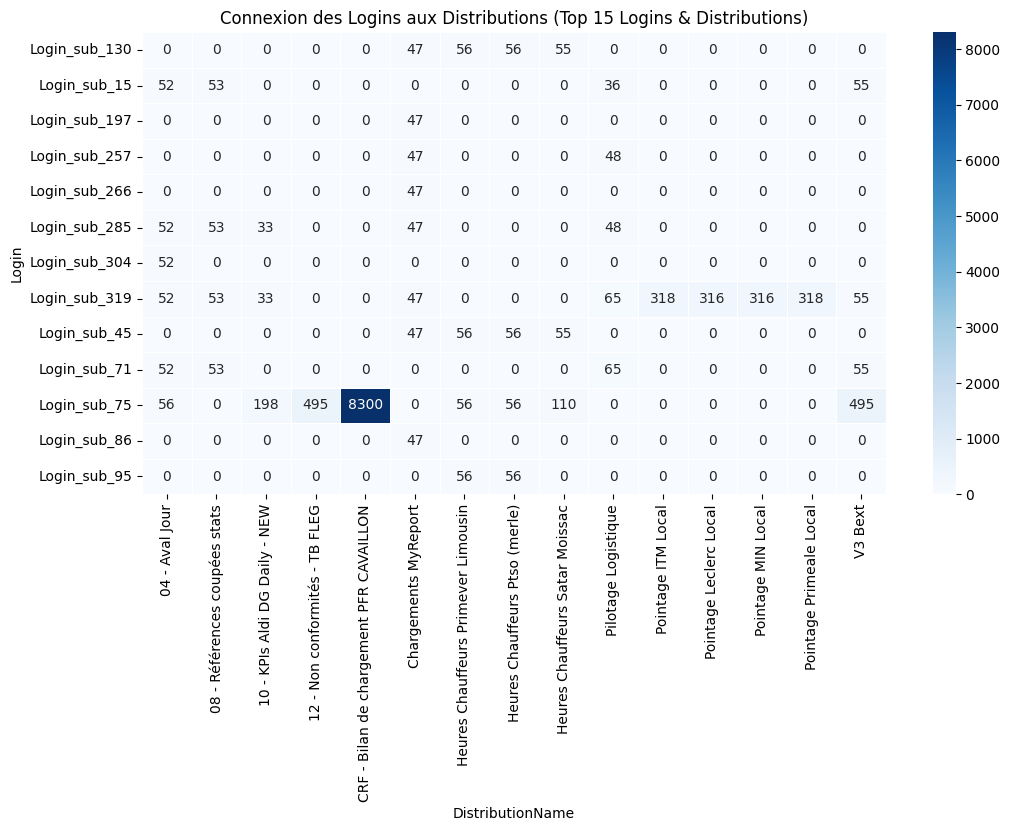

In [13]:
# Sélectionner les 15 logins les plus fréquents
top_login = df['Login'].value_counts().head(15).index
df_top_login = df[df['Login'].isin(top_login)]

# Sélectionner les 15 dashboards les plus utilisés par ces logins
top_DistributionName = df_top_login['DistributionName'].value_counts().head(15).index
df_top = df_top_login[df_top_login['DistributionName'].isin(top_DistributionName)]

# Créer la matrice Login x DashboardName
login_DistributionName_matrix = df_top.pivot_table(index='Login', columns='DistributionName', aggfunc='size', fill_value=0)

# Affichage de la heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(login_DistributionName_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("DistributionName")
plt.ylabel("Login")
plt.title("Connexion des Logins aux Distributions (Top 15 Logins & Distributions)")
plt.xticks(rotation=90)
plt.show()

In [15]:
# Convertir en datetime
df['DatetimeLog'] = pd.to_datetime(df['DatetimeLog'])

In [16]:
# Extraire le jour de la semaine en texte
jours_semaine = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
df['jour_semaine'] = df['DatetimeLog'].dt.weekday.map(lambda x: jours_semaine[x])

# Extraire l'heure arrondie à la tranche de 30 min
df['heure'] = df['DatetimeLog'].dt.hour + (df['DatetimeLog'].dt.minute // 60) * 0.5

# Formater l'affichage de l'heure en "9h00", "9h30", etc.
df['horaire'] = df['heure'].apply(lambda x: f"{int(x)}h{int((x % 1) * 60):02d}")

# Concaténer jour et horaire pour une meilleure lisibilité
df['jour_horaire'] = df['jour_semaine'].astype(str) + " " + df['horaire']

# Séparer jour et heure
df[['jour', 'horaire']] = df['jour_horaire'].str.split(' ', expand=True)

# Convertir le jour en catégorie ordonnée
df['jour'] = pd.Categorical(df['jour'], categories=jours_semaine, ordered=True)

# Convertir l'heure en entier pour tri correct
df['heure_num'] = df['horaire'].str.replace('h', '').astype(int)

# Trier d'abord par jour, puis par heure
df = df.sort_values(['jour', 'heure_num']).drop(columns=['jour', 'heure_num'])

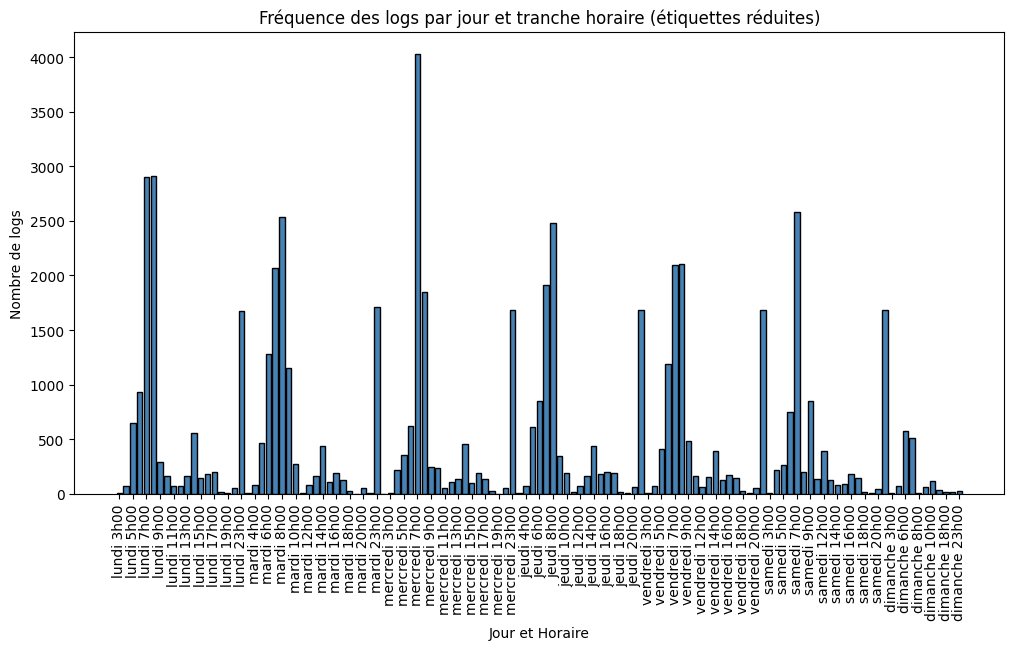

In [17]:
# Compter la fréquence des valeurs
freq_logs = df['jour_horaire'].value_counts().reset_index()
freq_logs.columns = ['jour_horaire', 'count']

# Fusionner avec le dataframe trié pour conserver l'ordre correct
freq_logs = df[['jour_horaire']].drop_duplicates().merge(freq_logs, on='jour_horaire', how='left')

# Taille du graphique
plt.figure(figsize=(12, 6))

# Tracer l'histogramme
plt.bar(freq_logs['jour_horaire'], freq_logs['count'], color='steelblue', edgecolor='black')

# Espacer les labels (afficher une étiquette toutes les 5 valeurs)
step = 2  # Modifier ce nombre si besoin
plt.xticks(range(0, len(freq_logs), step), freq_logs['jour_horaire'][::step], rotation=90, fontsize=10)

# Ajouter les labels
plt.xlabel("Jour et Horaire")
plt.ylabel("Nombre de logs")
plt.title("Fréquence des logs par jour et tranche horaire (étiquettes réduites)")

# Afficher le graphique
plt.show()

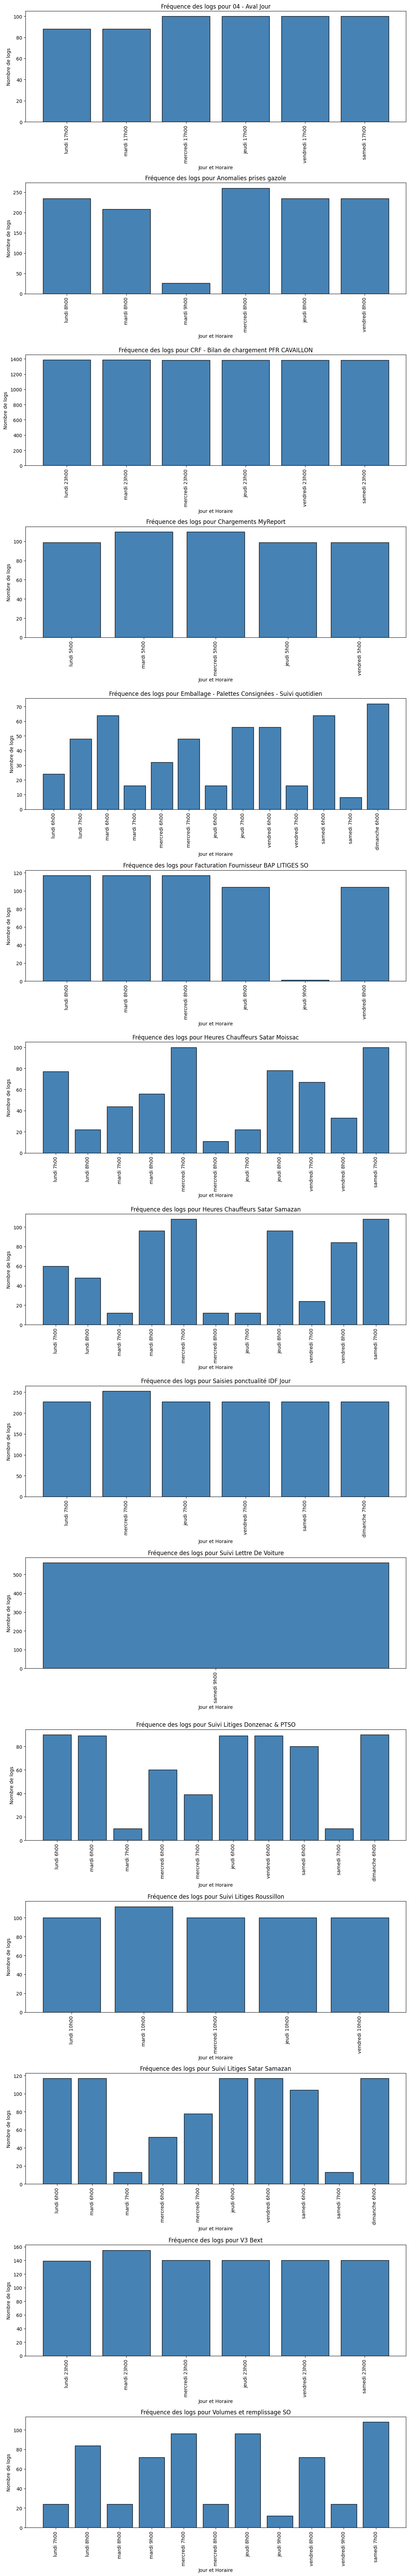

In [18]:
# Sélectionner les 15 DistributionName les plus fréquents
top_dashboards = df['DistributionName'].value_counts().head(15).index
df_top = df[df['DistributionName'].isin(top_dashboards)]

# Compter les occurrences par DistributionName et jour_horaire
freq_logs = df_top.groupby(['DistributionName', 'jour_horaire']).size().reset_index(name='count')

# Trier les jours et horaires
freq_logs[['jour', 'horaire']] = freq_logs['jour_horaire'].str.split(' ', expand=True)
freq_logs['jour'] = pd.Categorical(freq_logs['jour'], categories=jours_semaine, ordered=True)
freq_logs = freq_logs.sort_values(['DistributionName', 'jour', 'horaire'])

# Générer un graphique par DistributionName
dashboard_list = freq_logs['DistributionName'].unique()
fig, axes = plt.subplots(len(dashboard_list), 1, figsize=(12, 5 * len(dashboard_list)))

if len(dashboard_list) == 1:
    axes = [axes]  # S'assurer que axes est une liste si un seul graphique

for ax, dashboard in zip(axes, dashboard_list):
    subset = freq_logs[freq_logs['DistributionName'] == dashboard]
    ax.bar(subset['jour_horaire'], subset['count'], color='steelblue', edgecolor='black')
    ax.set_title(f"Fréquence des logs pour {dashboard}")
    ax.set_xlabel("Jour et Horaire")
    ax.set_ylabel("Nombre de logs")
    ax.set_xticks(range(0, len(subset), max(1, len(subset) // 15)))
    ax.set_xticklabels(subset['jour_horaire'][::max(1, len(subset) // 15)], rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

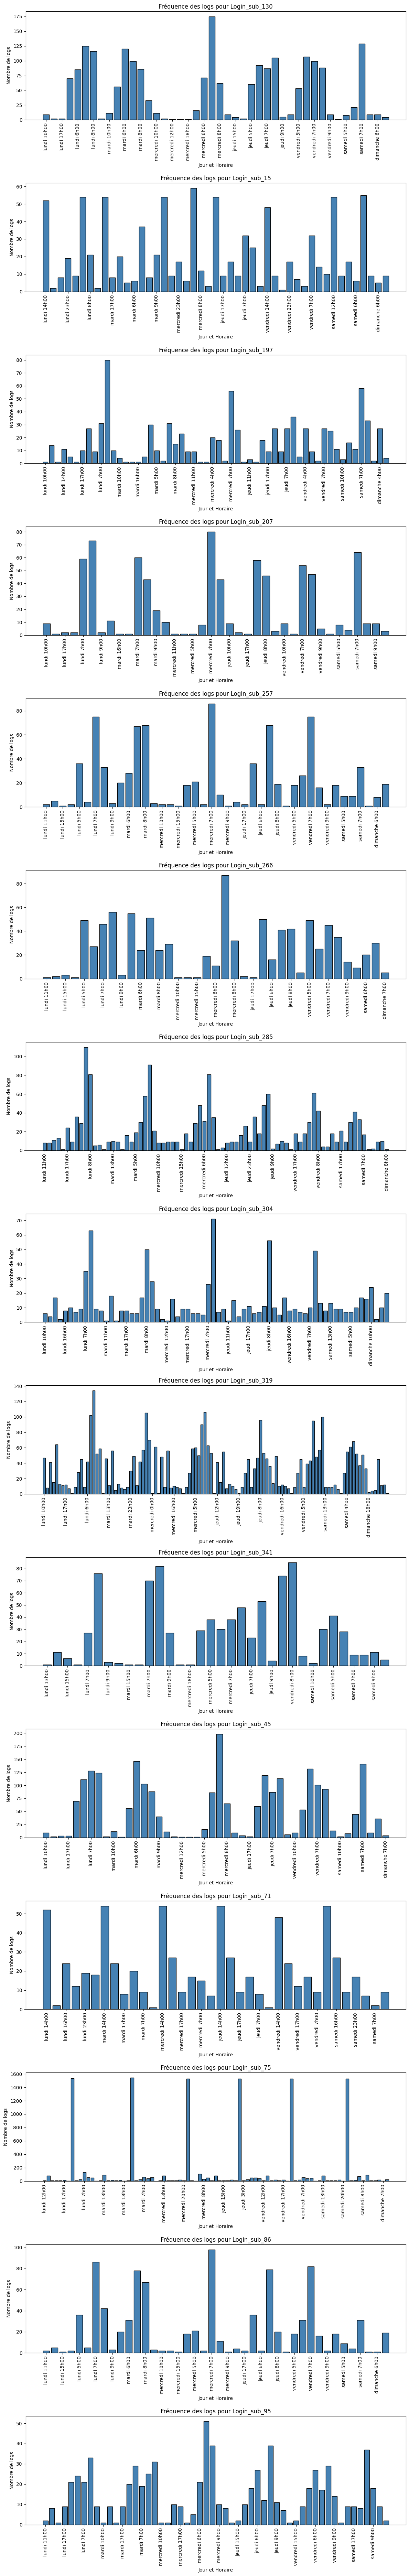

In [19]:
# Sélectionner les 15 Login les plus fréquents
top_dashboards = df['Login'].value_counts().head(15).index
df_top = df[df['Login'].isin(top_dashboards)]

# Compter les occurrences par Login et jour_horaire
freq_logs = df_top.groupby(['Login', 'jour_horaire']).size().reset_index(name='count')

# Trier les jours et horaires
freq_logs[['jour', 'horaire']] = freq_logs['jour_horaire'].str.split(' ', expand=True)
freq_logs['jour'] = pd.Categorical(freq_logs['jour'], categories=jours_semaine, ordered=True)
freq_logs = freq_logs.sort_values(['Login', 'jour', 'horaire'])

# Générer un graphique par Login
dashboard_list = freq_logs['Login'].unique()
fig, axes = plt.subplots(len(dashboard_list), 1, figsize=(12, 5 * len(dashboard_list)))

if len(dashboard_list) == 1:
    axes = [axes]  # S'assurer que axes est une liste si un seul graphique

for ax, dashboard in zip(axes, dashboard_list):
    subset = freq_logs[freq_logs['Login'] == dashboard]
    ax.bar(subset['jour_horaire'], subset['count'], color='steelblue', edgecolor='black')
    ax.set_title(f"Fréquence des logs pour {dashboard}")
    ax.set_xlabel("Jour et Horaire")
    ax.set_ylabel("Nombre de logs")
    ax.set_xticks(range(0, len(subset), max(1, len(subset) // 15)))
    ax.set_xticklabels(subset['jour_horaire'][::max(1, len(subset) // 15)], rotation=90, fontsize=10)

plt.tight_layout()
plt.show()